In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from xgboost import XGBClassifier  # Import XGBoost
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

In [5]:
# Load the dataset from CSV
data = pd.read_csv('cleaned_balanced_dataset.csv')

# Encode the 'diagnosis' column (Malignant -> 1, Benign -> 0)
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Handle missing values (impute with mean)
data = data.fillna(data.mean())

# Check for Infinity and replace with finite values
data = data.replace([np.inf, -np.inf], np.nan)
data = data.fillna(0)  # You can choose a different value for replacement if needed

In [6]:
# Split the dataset into features (X) and labels (y)
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']

In [7]:
# Use XGBoost for feature selection
xgb = XGBClassifier()
xgb.fit(X, y)
feature_importances = xgb.feature_importances_
indices = np.argsort(feature_importances)[::-1]
selected_indices = indices[:10]  # Select the top 10 features

In [8]:

# Select only the top features
X = X.iloc[:, selected_indices]

In [9]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Create a deep learning model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [12]:

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [14]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

Epoch 1/100
9/9 [==============================] - 1s 48ms/step - loss: 0.6517 - accuracy: 0.6494 - val_loss: 0.5477 - val_accuracy: 0.8235
Epoch 2/100
9/9 [==============================] - 0s 14ms/step - loss: 0.4383 - accuracy: 0.8893 - val_loss: 0.4143 - val_accuracy: 0.8971
Epoch 3/100
9/9 [==============================] - 0s 10ms/step - loss: 0.3228 - accuracy: 0.9188 - val_loss: 0.3407 - val_accuracy: 0.8971
Epoch 4/100
9/9 [==============================] - 0s 11ms/step - loss: 0.2554 - accuracy: 0.9262 - val_loss: 0.2912 - val_accuracy: 0.8971
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 0.2114 - accuracy: 0.9336 - val_loss: 0.2528 - val_accuracy: 0.9118
Epoch 6/100
9/9 [==============================] - 0s 12ms/step - loss: 0.1809 - accuracy: 0.9446 - val_loss: 0.2234 - val_accuracy: 0.9118
Epoch 7/100
9/9 [==============================] - 0s 10ms/step - loss: 0.1586 - accuracy: 0.9446 - val_loss: 0.2010 - val_accuracy: 0.9118
Epoch 8/100
9/9 [====

In [15]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

3/3 [==============================] - 0s 2ms/step


In [16]:
# Calculate overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Overall Accuracy: {accuracy:.2f}')

Overall Accuracy: 0.95


In [17]:
# Generate confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[37  2]
 [ 2 44]]


In [18]:
# Generate classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        39
           1       0.96      0.96      0.96        46

    accuracy                           0.95        85
   macro avg       0.95      0.95      0.95        85
weighted avg       0.95      0.95      0.95        85



In [19]:
# Generate classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        39
           1       0.96      0.96      0.96        46

    accuracy                           0.95        85
   macro avg       0.95      0.95      0.95        85
weighted avg       0.95      0.95      0.95        85



In [20]:
# Generate ROC curve and calculate AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f'ROC AUC: {roc_auc:.2f}')


ROC AUC: 0.95


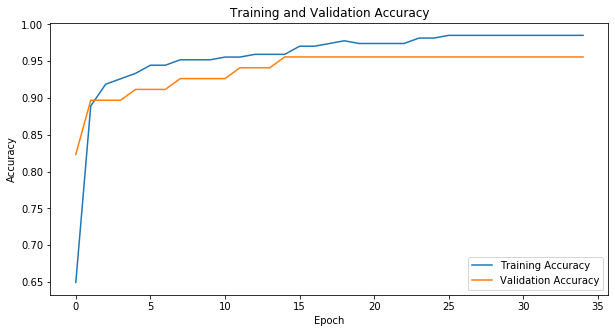

In [21]:
# Plot training and validation accuracy curves
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

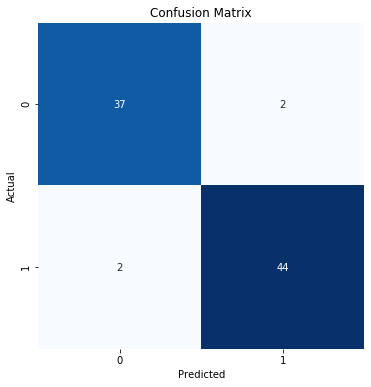

In [22]:
# Plot confusion matrix
import seaborn as sns
plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

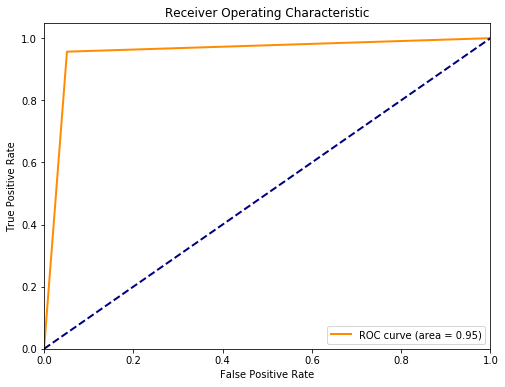

In [23]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
